# Day 3
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, split ny jet mult (1)

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
nJets = '1'
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "filtered_rot_cart_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':22, 'compileArgs':compileArgs}

## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train_' + nJets + '.hdf5', "r+")
valData = h5py.File(dirLoc + 'val_' + nJets + '.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 0.676s 


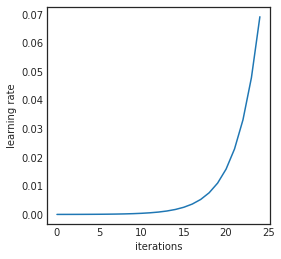

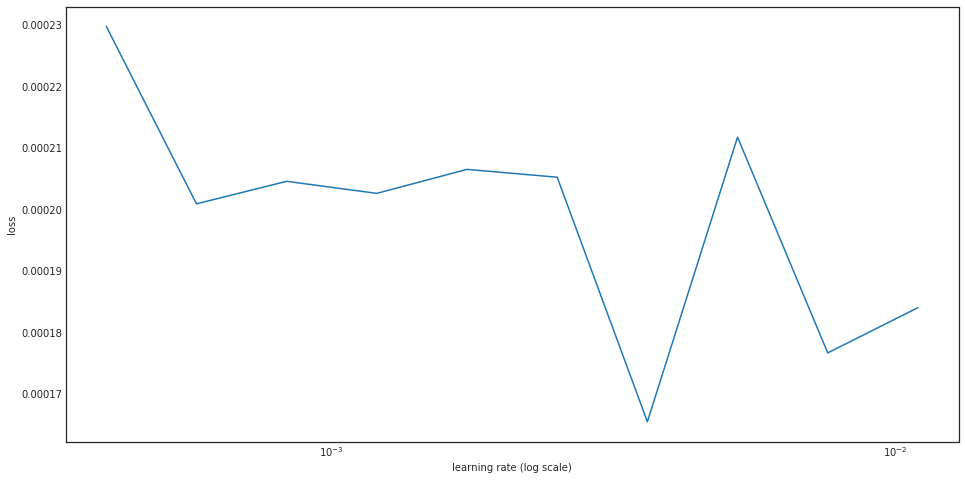

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.000162252056154
2 New best found: 0.000150629608113
3 New best found: 0.000147453117626
4 New best found: 0.000147388258839
5 New best found: 0.000140207369972
6 New best found: 0.000138868310639
7 New best found: 0.000138133487023
9 New best found: 0.000135266249698
10 New best found: 0.000133913268383
11 New best found: 0.00013381905887
12 New best found: 0.000132811549395
13 New best found: 0.000131640350242
14 New best found: 0.000131322561414
15 New best found: 0.000131321525637
16 New best found: 0.000131306880379
17 New best found: 0.000130469058734
20 New best found: 0.00012966012576
21 New best found: 0.000129366020967
22 New best found: 0.000129228083404
23 New best found: 0.000128657643578
24 New best found: 0.000127888004709
25 New best found: 0.000127341743805
26 New best found: 0.000126794702883
39 New best found: 0.000126365500426
44 New best fou

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104171). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000166288480212
2 New best found: 0.000151397861672
3 New best found: 0.000147717631213
4 New best found: 0.000141588138382
5 New best found: 0.000138978624842
6 New best found: 0.000137037198235
7 New best found: 0.000136787143084
8 New best found: 0.000136096422182
9 New best found: 0.000134307385561
10 New best found: 0.000133464659061
11 New best found: 0.000131576545632
12 New best found: 0.000131265679135
13 New best found: 0.00013066983804
14 New best found: 0.000130357248785
15 New best found: 0.000130282516858
16 New best found: 0.000129631852462
20 New best found: 0.000127634251166
22 New best found: 0.000127420107318
26 New best found: 0.000126991812767
27 New best found: 0.000126593672355
29 New best found: 0.000126517493666
30 New best found: 0.000126513690268
31 New best found: 0.000126508628942
38 New best found: 0.000125928390904
43 New best found: 0.000124927626092
56 New best found: 0.000124816030758
57 New best found: 0.000124700377242
61 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119055). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000171044082685
2 New best found: 0.000151463441187
3 New best found: 0.000148264375365
4 New best found: 0.000141573492162
5 New best found: 0.000137480976295
6 New best found: 0.00013593493568
7 New best found: 0.000135659595927
8 New best found: 0.000134303869455
9 New best found: 0.000133064529729
10 New best found: 0.00013272030522
11 New best found: 0.000129407929856
12 New best found: 0.000128225953311
14 New best found: 0.0001279283257
15 New best found: 0.000127884509945
20 New best found: 0.000127437776717
21 New best found: 0.000125115823694
29 New best found: 0.000125103051378
30 New best found: 0.000124955055759
31 New best found: 0.00012495206749
38 New best found: 0.000124814445539
39 New best found: 0.000123321502403
47 New best found: 0.000122956703542
48 New best found: 0.000122176437631
75 New best found: 0.000121542932859
93 New best found: 0.00012085114797
Early stopping after 193 epochs
Score is: {'loss': 0.00012085114796994036, 'AUC': 0.120521

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134617). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000164999263008
2 New best found: 0.000151945938053
3 New best found: 0.000148367965387
4 New best found: 0.000141061589582
5 New best found: 0.000137227680001
6 New best found: 0.000135423831653
7 New best found: 0.000134869036698
9 New best found: 0.000130939142252
10 New best found: 0.000128720580468
12 New best found: 0.000127760866056
13 New best found: 0.000126936406114
14 New best found: 0.000126797978501
15 New best found: 0.000126787462473
16 New best found: 0.0001261893392
18 New best found: 0.000125379033336
19 New best found: 0.000124101438824
20 New best found: 0.000123874016217
21 New best found: 0.000122979729996
24 New best found: 0.000122712317914
25 New best found: 0.000121940654354
26 New best found: 0.000121770570535
27 New best found: 0.000121528731021
28 New best found: 0.000121494284774
30 New best found: 0.000121437327303
31 New best found: 0.000121430047598
37 New best found: 0.000121174956027
38 New best found: 0.000120865098379
42 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150688). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000167783797663
2 New best found: 0.000153803190233
3 New best found: 0.000150813906021
4 New best found: 0.000143346567014
5 New best found: 0.000138379838578
6 New best found: 0.000137290078753
7 New best found: 0.000136435794835
8 New best found: 0.000136024163817
9 New best found: 0.000134100302155
10 New best found: 0.000131801762398
11 New best found: 0.000131609919198
12 New best found: 0.000129801724607
13 New best found: 0.000129768799398
14 New best found: 0.000129553466927
17 New best found: 0.0001293951873
19 New best found: 0.000129084817823
20 New best found: 0.000129077488224
21 New best found: 0.000128288877101
23 New best found: 0.000126748279244
25 New best found: 0.000126285274525
27 New best found: 0.000126279600786
29 New best found: 0.000126142720582
30 New best found: 0.000126007584651
31 New best found: 0.000125998640063
39 New best found: 0.000125001725855
41 New best found: 0.000124732998437
43 New best found: 0.000124722200632
48 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165250). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000170797714064
2 New best found: 0.00014880477109
3 New best found: 0.00014748738903
4 New best found: 0.000141561175322
5 New best found: 0.000137931975645
6 New best found: 0.000135588011348
7 New best found: 0.000135362231509
8 New best found: 0.000135277633193
9 New best found: 0.000131635372455
11 New best found: 0.000130316735587
12 New best found: 0.000129581290874
13 New best found: 0.0001286652649
14 New best found: 0.000128108916628
15 New best found: 0.000128090156601
18 New best found: 0.000126794627084
19 New best found: 0.000126011335352
21 New best found: 0.000125672126312
22 New best found: 0.00012501043561
23 New best found: 0.000124837633819
24 New best found: 0.000123614027777
25 New best found: 0.000123583354923
26 New best found: 0.000123405299692
27 New best found: 0.000123204298166
28 New best found: 0.000122730116607
29 New best found: 0.000122703490828
36 New best found: 0.000122549656735
43 New best found: 0.000122292487694
44 New best fou

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174510). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000168212655374
2 New best found: 0.000147288123972
3 New best found: 0.00014408037734
4 New best found: 0.000135821613058
5 New best found: 0.000132853353544
6 New best found: 0.000130340298472
7 New best found: 0.000130083524597
8 New best found: 0.000128435902786
9 New best found: 0.00012827108011
10 New best found: 0.000127665289235
11 New best found: 0.000126210298662
12 New best found: 0.000124613541249
13 New best found: 0.000123623968332
17 New best found: 0.00012360025961
18 New best found: 0.000122871808981
19 New best found: 0.00012251782761
20 New best found: 0.000122448139363
21 New best found: 0.000121729124364
22 New best found: 0.000121236257599
23 New best found: 0.000120470403002
24 New best found: 0.000119780548721
27 New best found: 0.000119242425446
29 New best found: 0.000119135132672
30 New best found: 0.000119095073833
36 New best found: 0.000118855599857
40 New best found: 0.000118185761383
41 New best found: 0.000117940551384
46 New best fo

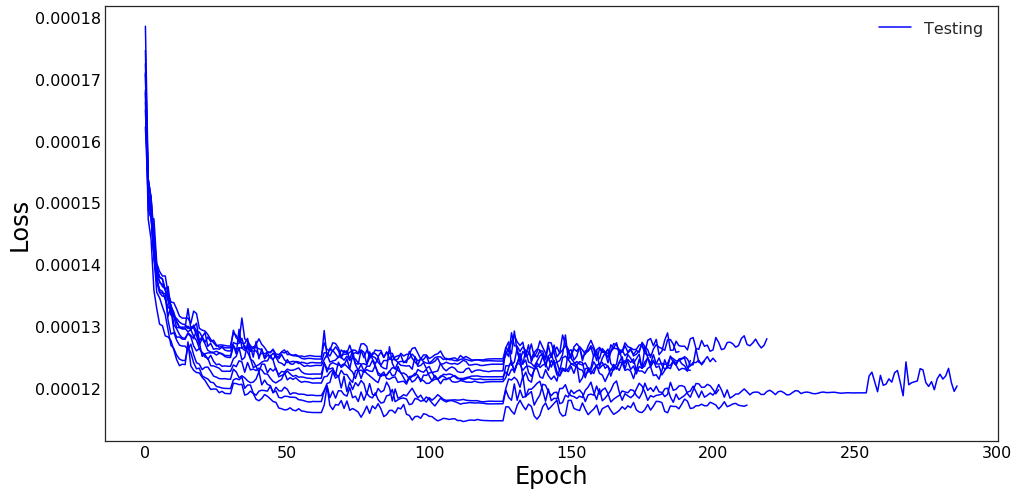

Mean wAUC = 0.09 +- 0.002
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=100, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 9 with loss = 0.00011458152031167144
Model 1 is 1 with loss = 0.00011710415283287825
Model 2 is 6 with loss = 0.00011769573360190075
Model 3 is 8 with loss = 0.00012063126846547365
Model 4 is 5 with loss = 0.00012085114796994036
Model 5 is 2 with loss = 0.0001210304499919572
Model 6 is 7 with loss = 0.0001224918102829316
Model 7 is 3 with loss = 0.0001236531377344395
Model 8 is 4 with loss = 0.00012387826671243134
Model 9 is 0 with loss = 0.0001245342220748413


## Response on development data

In [10]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000764443134969s per sample

Predicting batch 2 out of 10
Prediction took 0.000224814808499s per sample

Predicting batch 3 out of 10
Prediction took 0.000222466477727s per sample

Predicting batch 4 out of 10
Prediction took 0.00022371129633s per sample

Predicting batch 5 out of 10
Prediction took 0.000222195355374s per sample

Predicting batch 6 out of 10
Prediction took 0.000224041254731s per sample

Predicting batch 7 out of 10
Prediction took 0.000223872624308s per sample

Predicting batch 8 out of 10
Prediction took 0.000224220354903s per sample

Predicting batch 9 out of 10
Prediction took 0.000224807503414s per sample

Predicting batch 10 out of 10
Prediction took 0.000230894400896s per sample



In [11]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.892536180906, weighted 0.922368012067


## Response on val data

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000258959445757s per sample

Predicting batch 2 out of 10
Prediction took 0.000240674031149s per sample

Predicting batch 3 out of 10
Prediction took 0.00023388278853s per sample

Predicting batch 4 out of 10
Prediction took 0.000244617308538s per sample

Predicting batch 5 out of 10
Prediction took 0.000239258501162s per sample

Predicting batch 6 out of 10
Prediction took 0.000245250425031s per sample

Predicting batch 7 out of 10
Prediction took 0.0002330218592s per sample

Predicting batch 8 out of 10
Prediction took 0.000237032828792s per sample

Predicting batch 9 out of 10
Prediction took 0.000236762569797s per sample

Predicting batch 10 out of 10
Prediction took 0.000230493545532s per sample



In [13]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.889118359687, weighted 0.914995169461


## Evaluation

### Import in dataframe

In [14]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [15]:
valData = convertToDF(valData)

15509 candidates loaded


In [16]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

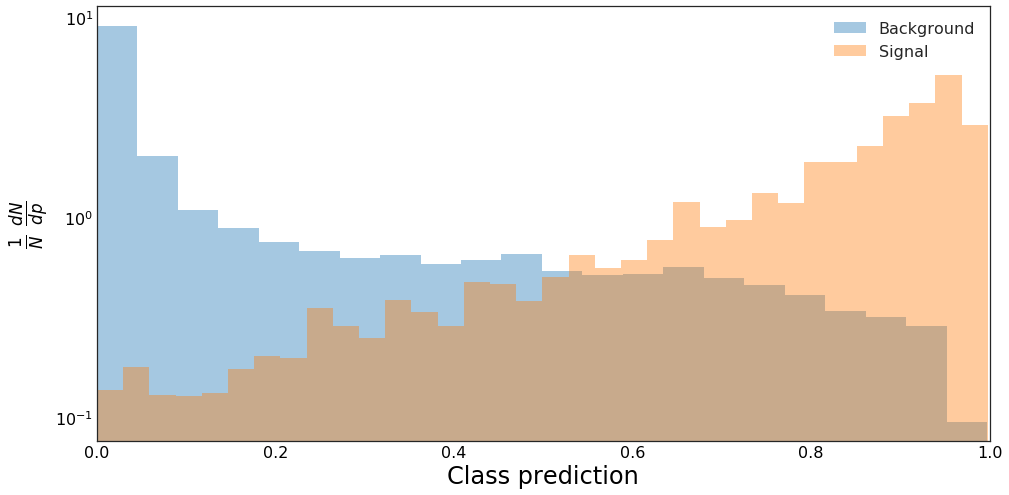

In [17]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [18]:
amsScan(valData)

[0.9622855186462402, 0.8141950549610205]


[0.5772457563085962,
 0.6055793549992622,
 0.3695522695673808,
 0.45699449459933406,
 0.7752933911309193,
 0.4976506308802192,
 0.7335853209208448,
 0.4536778595645127,
 0.3973267154258632,
 0.4005610069745741,
 0.776454182103863,
 0.6763006588504926,
 0.3345072510787892,
 0.30394690488608284,
 0.7227418298385968,
 0.4611934614047058,
 0.5806040529917949,
 0.5657644145240184,
 0.3267757139061077,
 0.7648586161873685,
 0.7180505629981169,
 0.33310566228191724,
 0.33131960187397086,
 0.7350097786610195,
 0.369015542659256,
 0.6062326918478285,
 0.49383021828469975,
 0.6313262854962506,
 0.40478354643733255,
 0.298143711319189,
 0.7713739450883373,
 0.724770859257394,
 0.7504809853482263,
 0.36218679477405963,
 0.7771106080323422,
 0.2989337355961578,
 0.30206533534429925,
 0.34456569008154947,
 0.4191763573703969,
 0.37052547135344616,
 0.36457744853713814,
 0.29860152958980307,
 0.6335176154022978,
 0.3527597593101379,
 0.3058367488100579,
 0.3186033072316261,
 0.7713726618558859,
 0.77

In [20]:
def scoreTest(ensemble, weights, nJets):
    testData = h5py.File(dirLoc + 'testing_' + nJets + '.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

def saveTest(cut, name, nJets):
    testData = h5py.File(dirLoc + 'testing_' + nJets + '.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [21]:
scoreTest(ensemble, weights, nJets)

Predicting batch 1 out of 10
Prediction took 0.000224893353836s per sample

Predicting batch 2 out of 10
Prediction took 0.000220672114402s per sample

Predicting batch 3 out of 10
Prediction took 0.000219686481432s per sample

Predicting batch 4 out of 10
Prediction took 0.000220322353279s per sample

Predicting batch 5 out of 10
Prediction took 0.000221877510526s per sample

Predicting batch 6 out of 10
Prediction took 0.000221574654872s per sample

Predicting batch 7 out of 10
Prediction took 0.000222868295896s per sample

Predicting batch 8 out of 10
Prediction took 0.000222458891958s per sample

Predicting batch 9 out of 10
Prediction took 0.000224099401719s per sample

Predicting batch 10 out of 10
Prediction took 0.000222433632598s per sample



In [ ]:
saveTest(0.9622855186462402, 'Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart')

!kaggle competitions submit -c higgs-boson -f ../Data/Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart_test.csv -m"Day2"